In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from datetime import datetime
from datetime import timedelta

All data are obtained from https://finance.yahoo.com/

In [2]:
AP= pd.read_csv('AAPL.csv')
M= pd.read_csv('MSFT.csv')
G= pd.read_csv('GOOG.csv')
AM= pd.read_csv('AMZN.csv')

## 1
Data does not contain missing or dupilcated values

In [3]:
print(AP.isnull().sum())
print(AP.duplicated().sum())
print(M.isnull().sum())
print(M.duplicated().sum())
print(G.isnull().sum())
print(G.duplicated().sum())
print(AM.isnull().sum())
print(AM.duplicated().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0


In [4]:
M.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,330.092285,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,324.432190,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,311.977875,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,309.512634,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,309.670441,32720000


# 2
Converting data into time series

In [5]:
AP['Date'] = pd.to_datetime(AP['Date'])
M['Date'] = pd.to_datetime(M['Date'])
G['Date'] = pd.to_datetime(G['Date'])
AM['Date'] = pd.to_datetime(AM['Date'])

In [6]:
AP = AP.set_index('Date',inplace=False)
M = M.set_index('Date',inplace=False)
G = G.set_index('Date',inplace=False)
AM = AM.set_index('Date',inplace=False)
AP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144318,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100


# 3 
Determine which stock is traded in average the most


In [7]:
print("Apple: ",AP['Volume'].mean())
print("Microsoft: ",M['Volume'].mean())
print("Google: ",G['Volume'].mean())
print("Amazon: ",AM['Volume'].mean())

Apple:  87910376.4940239
Microsoft:  31219321.513944224
Google:  28623231.474103585
Amazon:  76080702.39043824


Clearly, Apple is the most traded in avearge

# 4
Plot for the whole period, the Adj Close prices for all four stocks on the same figure. Using different colors and labels.

we can see that there is trend in the data, and we can differencing as solution

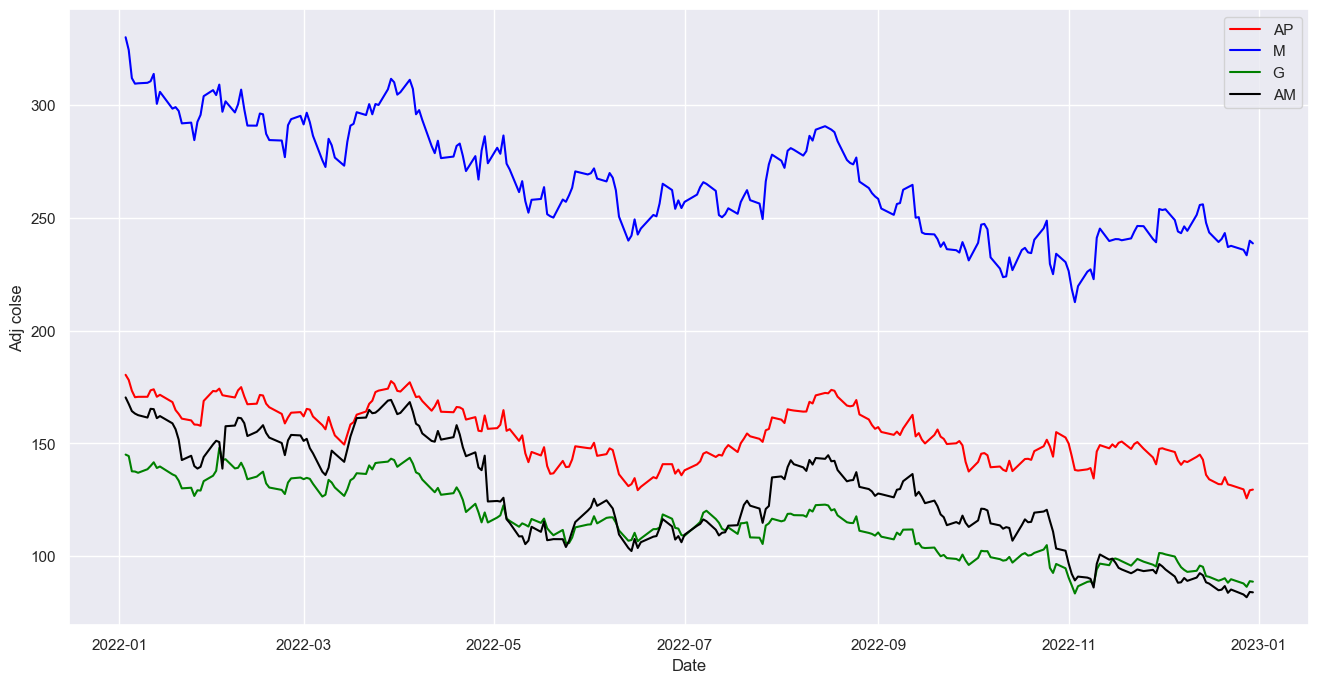

In [8]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot( AP['Adj Close'],color='red',label='AP')
ax.plot(M['Adj Close'],color='blue',label='M')
ax.plot( G['Adj Close'],color='green',label='G')
ax.plot(AM['Adj Close'],color='black',label='AM')
ax.set_xlabel('Date')
ax.set_ylabel("Adj colse")
ax.legend()

The scale of AAPL and MSFT stock proces are very different than from the prices of the stocks GOOG and AMZN. Therefore we cannot see the price movements. We can scale the stocks with min-max normalization

In [9]:
aaple_max = AP['Adj Close'].max()
aaple_min = AP['Adj Close'].min()
aaple_range =aaple_max-aaple_min

msft_max = M['Adj Close'].max()
msft_min = M['Adj Close'].min()
msft_range = msft_max - msft_min

goog_max = G['Adj Close'].max()
goog_min = G['Adj Close'].min()
goog_range = goog_max - goog_min

amzn_max = AM['Adj Close'].max()
amzn_min = AM['Adj Close'].min()
amzn_range = amzn_max - amzn_min

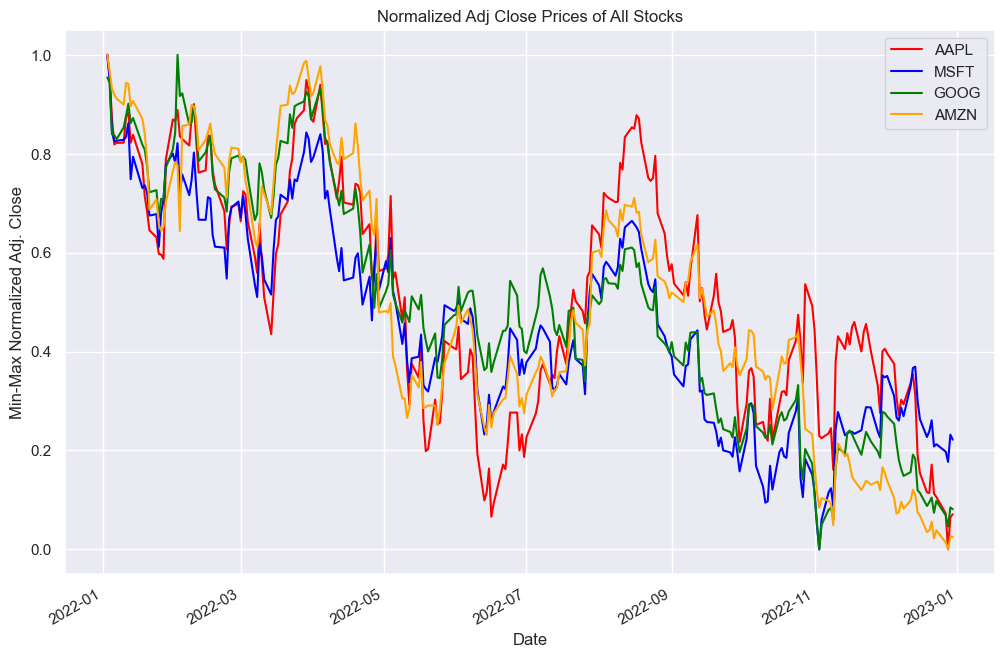

In [10]:
plt.figure(figsize=(12,8))
((AP['Adj Close']-aaple_min)/aaple_range).plot(color='red',label='AAPL')
((M['Adj Close']-msft_min)/msft_range).plot(color='blue',label='MSFT')
((G['Adj Close']-goog_min)/goog_range).plot(color='green',label='GOOG')
((AM['Adj Close']-amzn_min)/amzn_range).plot(color='orange',label='AMZN')
plt.ylabel('Min-Max Normalized Adj. Close')
plt.title('Normalized Adj Close Prices of All Stocks')
plt.legend()

# 5
the average Low price for all four stocks between the dates 03/15/2022 (included) and 06/15/2022 (excluded).

In [11]:
print('Average low price for Apple')
AP['Low'].loc[datetime(2022,3,15):datetime(2022,6,14) ].mean()


Average low price for Apple


155.195

In [12]:
print('Average low price for Google')
G['Low'].loc[datetime(2022,3,15):datetime(2022,6,14) ].mean()

Average low price for Google


121.65083828125

In [13]:
print('Average low price for Microsoft')
M['Low'].loc[datetime(2022,3,15):datetime(2022,6,14) ].mean()

Average low price for Microsoft


276.343749296875

In [14]:
print('Average low price for Amazon')
AM['Low'].loc[datetime(2022,3,15):datetime(2022,6,14) ].mean()

Average low price for Amazon


132.886258

# 6
Plot in the same figure the boxplot of High prices for the whole period of all four stocks

C:\Users\Hassan\AppData\Local\Temp\ipykernel_3396\2454181425.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Apple', 'Microsoft',


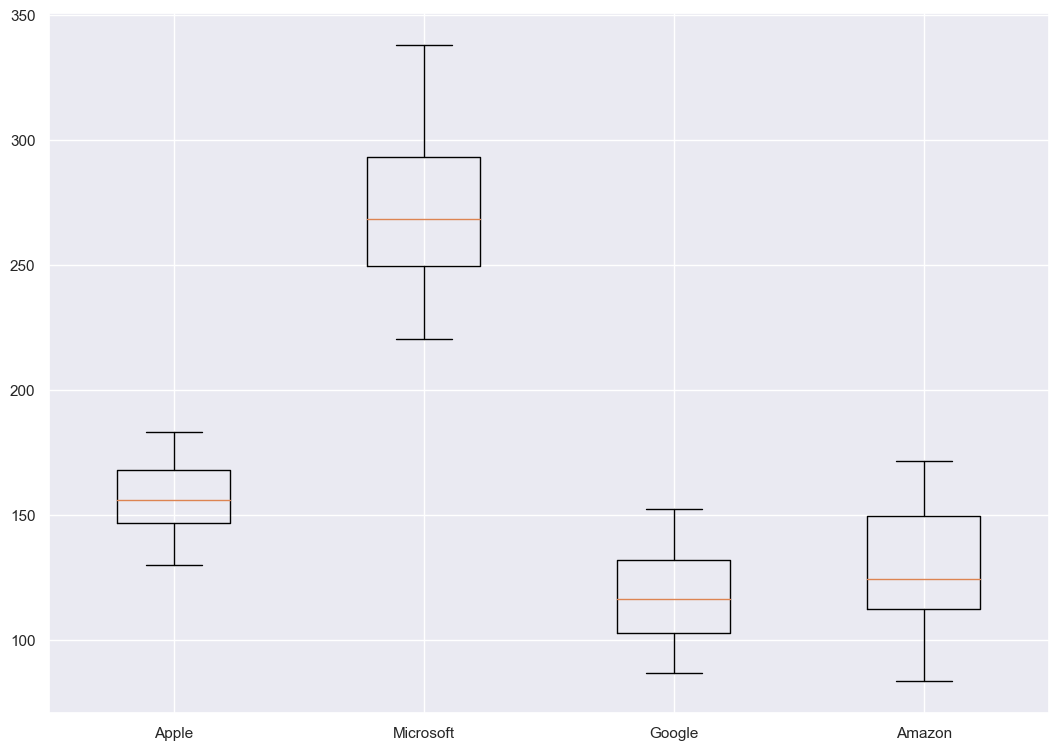

In [15]:
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Apple', 'Microsoft',
                    'Google', 'Amazon'])
 
bp = ax.boxplot([AP['High'],M['High'],G['High'],AM['High']])

plt.show()

In [16]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [18]:
import mplfinance as mpf


# 7
The candlestick chart of AAPL stock for the dates between 03/15/2022 (included) and 06/15/2022 (excluded).

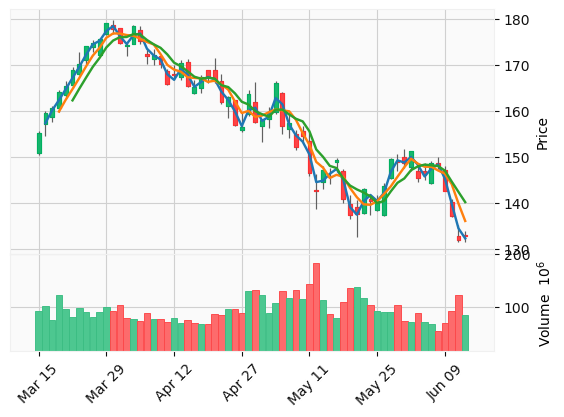

In [19]:
kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(11,8),figscale=0.85)
mpf.plot(AP.loc[datetime(2022,3,15):datetime(2022,6,14)],**kwargs,style='yahoo')

 the candlestick chart 10 days Moving Average(MA) and 20 days MA lines on Open prices. 

In [20]:
ts_aapl_s = AP['15-3-2022' :'14-6-2022']

C:\Users\Hassan\AppData\Local\Temp\ipykernel_3396\3865196560.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts_aapl_s = AP['15-3-2022' :'14-6-2022']


In [21]:
AP['OpenRoll10'] = ts_aapl_s['Open'].rolling(10).mean()
AP['OpenRoll20'] = ts_aapl_s['Open'].rolling(20).mean()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_3396\1537520010.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rolls = mpf.make_addplot(AP[['OpenRoll10','OpenRoll20']]['15-3-2022' :'14-6-2022'],width=0.5)


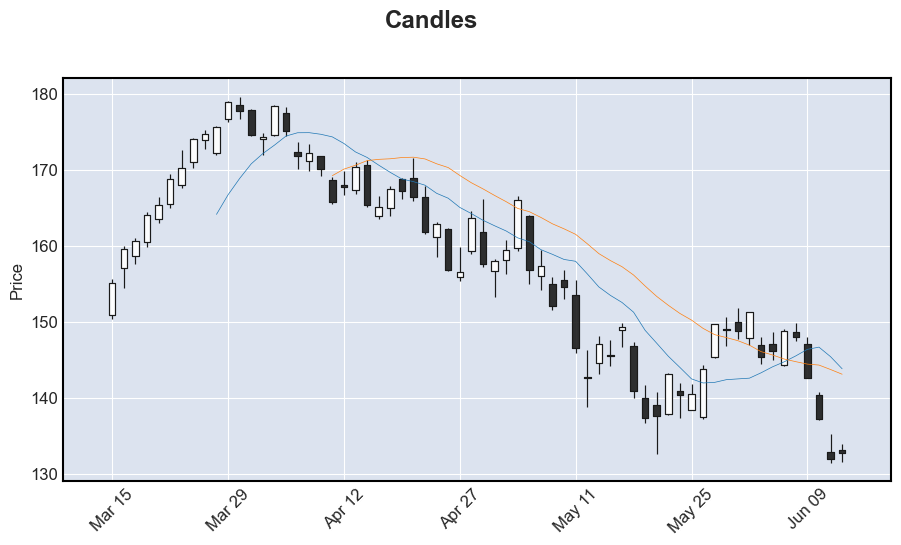

In [22]:
rolls = mpf.make_addplot(AP[['OpenRoll10','OpenRoll20']]['15-3-2022' :'14-6-2022'],width=0.5)
mpf.plot(ts_aapl_s,type='candlestick',figratio=(16,8),addplot=rolls,title='Candles')